###  Problem Statement:

Investment is a game of understanding historic data of investment objects under different events but it is still a game of chances to minimize the risk we apply analyticsto find the equilibrium investment.
To understand the Foreign direct investment in India for the last 17 years from 2000-01 to 2016-17. 

This dataset contains 
- sector and financial year-wise data of FDI in India
- Sector-wise investment analysis
- Year-wise investment analysis

Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings

### Foreign Direct Investment Analysis

#### Importing require libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# extract csv file from inner system 

FDI = pd.read_csv('FDI_in_India.csv')
FDI.style.set_caption('FDI (amount in USD million)').format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,9.35,211.07,56.78,80.64,102.78,12.09,87.71,1405.04,349.29,265.53,556.43,2029.98,214.80,112.23,1079.02,103.02,180.40
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,2.66,0.74,25.57,40.53,74.88,39.50,166.44,313.75,184.60,212.78,230.70,159.13,286.88
8,ELECTRICAL EQUIPMENTS,79.76,65.76,34.71,73.20,97.40,39.50,76.85,653.74,417.35,728.27,153.90,566.39,195.87,134.31,574.83,444.88,2230.69
9,COMPUTER SOFTWARE & HARDWARE,228.39,419.39,314.24,368.32,527.90,1359.97,2613.33,1382.25,1543.34,871.86,779.81,796.35,485.96,1126.27,2296.04,5904.36,3651.71


In [3]:
FDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [4]:
FDI.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [5]:
for i in FDI['Sector']:
    print(i)

METALLURGICAL INDUSTRIES
MINING
POWER
NON-CONVENTIONAL ENERGY
COAL PRODUCTION
PETROLEUM & NATURAL GAS
BOILERS AND STEAM GENERATING PLANTS
PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)
ELECTRICAL EQUIPMENTS
COMPUTER SOFTWARE & HARDWARE
ELECTRONICS
TELECOMMUNICATIONS
INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)
AUTOMOBILE INDUSTRY
AIR TRANSPORT (INCLUDING AIR FREIGHT)
SEA TRANSPORT
PORTS
RAILWAY RELATED COMPONENTS
INDUSTRIAL MACHINERY
MACHINE TOOLS
AGRICULTURAL MACHINERY
EARTH-MOVING MACHINERY
MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES
COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS
MEDICAL AND SURGICAL APPLIANCES
INDUSTRIAL INSTRUMENTS
SCIENTIFIC INSTRUMENTS
MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS
FERTILIZERS
CHEMICALS (OTHER THAN FERTILIZERS)
PHOTOGRAPHIC RAW FILM AND PAPER
DYE-STUFFS
DRUGS & PHARMACEUTICALS
TEXTILES (INCLUDING DYED,PRINTED)
PAPER AND PULP (INCLUDING PAPER PRODUCTS)
SUGAR
FERMENTATION INDUSTRIES
FOOD PROCESSING INDUSTRIES
VEGETABLE OILS AND VANASPATI
SOA

##### Observation - There are two type of column,
1) Sector column contains 63 different sectors has received FDI from 2000-01 to 2016-17.

2) Year column shows amount recieved to particular sector from foreign from 2000-01 to 2016-17.

In [6]:
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
Sectors = ['Sector']

In [7]:
# Check for any null values present in dataset or not

FDI.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

#### No null value present 

#### Now we convert USD to INR which gives us better understanding of recieved amount and visualization of data.

In [8]:
# Exchange rate. reference = https://en.wikipedia.org/wiki/Exchange_rate_history_of_the_Indian_rupee

rate = [45.68,47.69,48.39,45.95,44.93,44.27,45.24,40.26,45.99,47.44,45.56,47.92,54.40,60.50,61.14,65.46,67.07]

In [9]:
# Create a function which is convert FDIs value from USD to INR  


def multiply_columns(df, col_list, num):
    for col in col_list:
        df[col] = df[col] * rate[col_list.index(col)]
    return df

In [10]:
FDI_USD = FDI.copy() 
FDI_INR = multiply_columns(FDI, Year, rate)

In [11]:
FDI_INR.style.set_caption('FDI (amount in crore INR)').format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,1036.48,674.34,1771.56,372.65,9003.07,6601.99,7688.09,47335.69,44147.64,19919.11,50031.26,85591.83,79762.91,34341.61,21970.05,29870.05,96592.87
1,MINING,60.30,310.94,486.80,1078.91,445.71,327.60,299.49,17889.93,1571.02,8273.54,3622.48,6835.79,3149.22,770.17,41843.60,34083.06,3739.15
2,POWER,4084.71,36122.31,2860.33,1244.79,1948.61,3217.99,7109.47,39804.26,41743.28,60333.72,57941.84,79182.05,29140.99,64497.84,43228.43,56871.65,74647.57
3,NON-CONVENTIONAL ENERGY,0.00,0.00,82.26,190.23,57.06,59.76,110.39,2368.09,5789.22,29532.35,9768.06,21667.99,60194.69,25062.12,37659.18,50830.34,52554.04
4,COAL PRODUCTION,0.00,0.00,0.00,1.84,0.00,404.63,58.81,566.86,10.12,0.00,0.00,0.00,0.00,179.08,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,427.11,10065.93,2747.58,3705.41,4617.91,535.22,3968.00,56566.91,16063.85,12596.74,25350.95,97276.64,11685.12,6789.91,65971.28,6743.69,12099.43
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,1.84,24.26,0.00,149.74,60.79,0.00,187.86,28.70,1523.38,1090.72,10.29,81.32,5099.99,3615.74
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,119.51,32.76,1156.79,1631.74,3443.73,1873.88,7583.01,15034.90,10042.24,12873.19,14105.00,10416.65,19241.04
8,ELECTRICAL EQUIPMENTS,3643.44,3136.09,1679.62,3363.54,4376.18,1748.67,3476.69,26319.57,19193.93,34549.13,7011.68,27141.41,10655.33,8125.76,35145.11,29121.84,149612.38
9,COMPUTER SOFTWARE & HARDWARE,10432.86,20000.71,15206.07,16924.30,23718.55,60205.87,118227.05,55649.38,70978.21,41361.04,35528.14,38161.09,26436.22,68139.33,140379.89,386499.41,244920.19


#### Unpivote DataFrame from wide to long 

In [12]:
melt = pd.melt(FDI_USD, id_vars= Sectors, value_vars= Year, var_name= 'Year', value_name= 'FDI_amount in USD (million)',
              ignore_index=True)

melt

,Sector,Year,FDI_amount in USD (million)
0,METALLURGICAL INDUSTRIES,2000-01,22.69
1,MINING,2000-01,1.32
2,POWER,2000-01,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,53.17
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,105.14


In [13]:
melt1 = pd.melt(FDI_INR, id_vars= Sectors, value_vars= Year, var_name= 'Year', value_name= 'FDI_amount in INR (crore)',
              ignore_index=True)
melt1 = round(melt1,2)
melt1

,Sector,Year,FDI_amount in INR (crore)
0,METALLURGICAL INDUSTRIES,2000-01,1036.48
1,MINING,2000-01,60.30
2,POWER,2000-01,4084.71
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,3566.11
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,124799.16
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,7051.74


#### Merge FDI_amount in USD (million) column in melt1 DataFrame

In [14]:
Merged = melt1.merge(melt, how='left')
Merged

,Sector,Year,FDI_amount in INR (crore),FDI_amount in USD (million)
0,METALLURGICAL INDUSTRIES,2000-01,1036.48,22.69
1,MINING,2000-01,60.30,1.32
2,POWER,2000-01,4084.71,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00,0.00
4,COAL PRODUCTION,2000-01,0.00,0.00
...,...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,3566.11,53.17
1067,COIR,2016-17,0.00,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,124799.16,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,7051.74,105.14


In [15]:
# Sorting the Sector and Year column

Sorted = Merged.sort_values(['Sector','Year'], ignore_index=True)
Sorted

,Sector,Year,FDI_amount in INR (crore),FDI_amount in USD (million)
0,AGRICULTURAL MACHINERY,2000-01,166.28,3.64
1,AGRICULTURAL MACHINERY,2001-02,49.60,1.04
2,AGRICULTURAL MACHINERY,2002-03,652.30,13.48
3,AGRICULTURAL MACHINERY,2003-04,2184.46,47.54
4,AGRICULTURAL MACHINERY,2004-05,0.00,0.00
...,...,...,...,...
1066,VEGETABLE OILS AND VANASPATI,2012-13,5896.42,108.39
1067,VEGETABLE OILS AND VANASPATI,2013-14,1303.78,21.55
1068,VEGETABLE OILS AND VANASPATI,2014-15,9069.51,148.34
1069,VEGETABLE OILS AND VANASPATI,2015-16,2240.04,34.22


### Statistics for each sector

In [16]:
print('\n Statistics for each sector as follows \n','-'*60, sep=' ')
print(pd.DataFrame(Sorted.groupby('Sector').describe().loc[ : , : ]).transpose())


 Statistics for each sector as follows 
 ------------------------------------------------------------
Sector                             AGRICULTURAL MACHINERY  \
FDI_amount in INR (crore)   count               17.000000   
                            mean              1395.728824   
                            std               1728.999741   
                            min                  0.000000   
                            25%                132.740000   
                            50%                652.300000   
                            75%               2184.460000   
                            max               5190.300000   
FDI_amount in USD (million) count               17.000000   
                            mean                26.423529   
                            std                 32.712807   
                            min                  0.000000   
                            25%                  2.770000   
                            50%            

In [17]:
Sorted = Sorted[['Sector','FDI_amount in INR (crore)', 'FDI_amount in USD (million)'
                 ,]].replace(["CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects"
                              ,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)"
                              ,'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)']
                             ,["CONSTRUCTION DEVELOPMENT","SERVICES SECTOR",'TEA AND COFFEE'])

### Sector by sector total FDI from 2000-01 to 2016-17

In [18]:
Sectorwise_FDI = Sorted.groupby('Sector').sum()
Sectorwise_FDI.sort_values(by='FDI_amount in USD (million)',ascending=False)

,FDI_amount in INR (crore),FDI_amount in USD (million)
Sector,,
SERVICES SECTOR,3163475.83,59476.49
COMPUTER SOFTWARE & HARDWARE,1372768.31,24669.49
CONSTRUCTION DEVELOPMENT,1151859.62,24293.09
TELECOMMUNICATIONS,1309660.48,23946.01
AUTOMOBILE INDUSTRY,926226.59,16673.92
...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,2783.66,67.28
COAL PRODUCTION,1221.34,27.74
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",416.15,7.98


##### From above, 
Highest FDI comes in service sector and lowest in coir. Also computer, construction, telecommunications and automoblie sector 
are in top 5.

### Data analysis by visuals

<AxesSubplot:title={'center':'Sector by Sector FDI'}, xlabel='Sector', ylabel='FDI_amount in INR (crore)'>

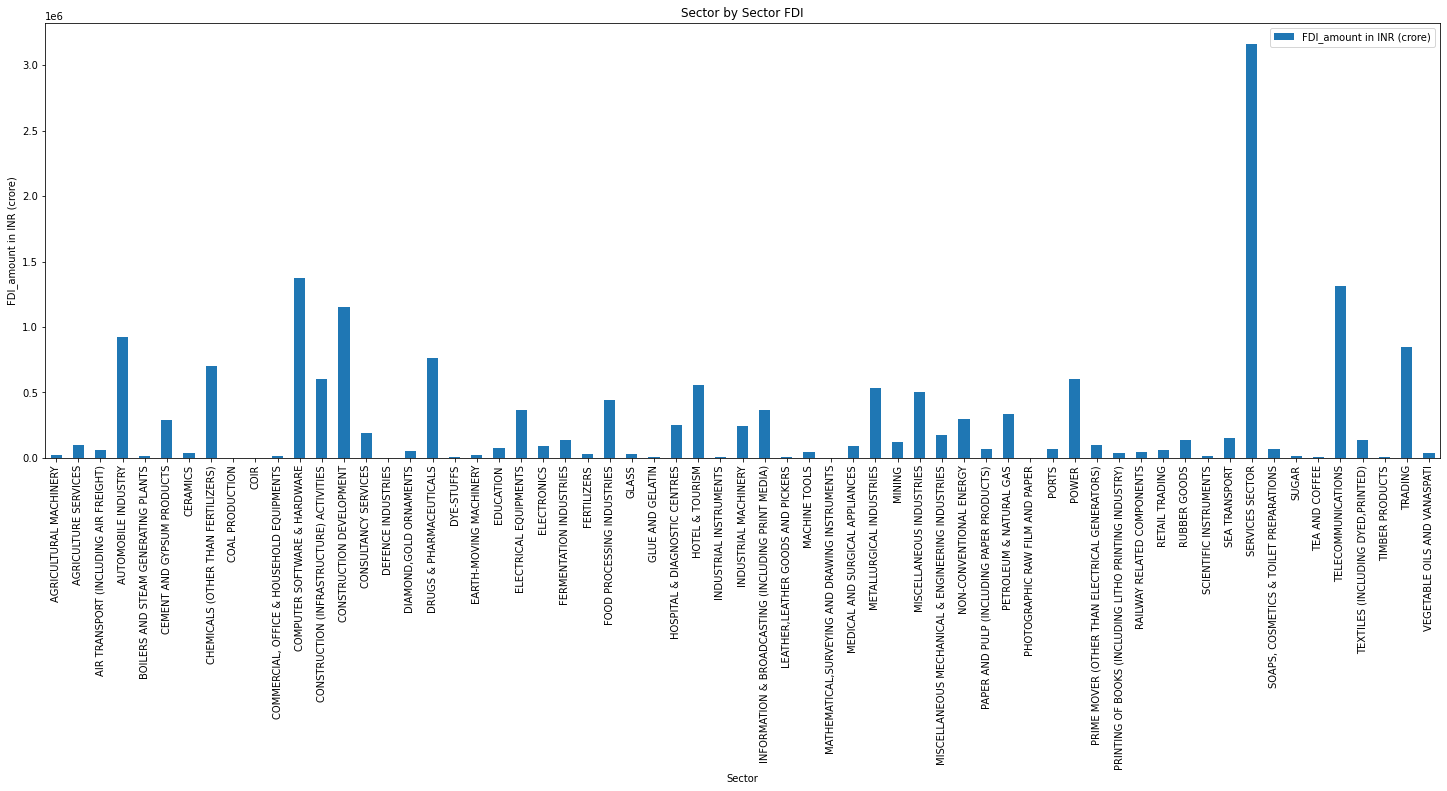

In [19]:
Sectorwise_FDI.plot(kind='bar',y='FDI_amount in INR (crore)',figsize = (25,8), legend= True, title='Sector by Sector FDI',
                    ylabel='FDI_amount in INR (crore)')

### Top 15 sectors that got foreign direct investment (FDI)

In [20]:
top15 = Sectorwise_FDI.nlargest(15,['FDI_amount in INR (crore)'])
top15

,FDI_amount in INR (crore),FDI_amount in USD (million)
Sector,,
SERVICES SECTOR,3163475.83,59476.49
COMPUTER SOFTWARE & HARDWARE,1372768.31,24669.49
TELECOMMUNICATIONS,1309660.48,23946.01
CONSTRUCTION DEVELOPMENT,1151859.62,24293.09
AUTOMOBILE INDUSTRY,926226.59,16673.92
TRADING,844878.35,14210.88
DRUGS & PHARMACEUTICALS,763776.32,14706.90
CHEMICALS (OTHER THAN FERTILIZERS),700311.76,13293.09
POWER,603979.84,11589.13


In [21]:
# The total percentage of stakehold by sector

total_FDI = round(melt1['FDI_amount in INR (crore)'].sum(),2)
Sum = top15['FDI_amount in INR (crore)'].sum()
top15['% of total'] = round(top15['FDI_amount in INR (crore)']/Sum*100,2) 
top15['% to amount'] = round((top15['FDI_amount in INR (crore)']/total_FDI)*100,2)
top15

,FDI_amount in INR (crore),FDI_amount in USD (million),% of total,% to amount
Sector,,,,
SERVICES SECTOR,3163475.83,59476.49,22.85,17.65
COMPUTER SOFTWARE & HARDWARE,1372768.31,24669.49,9.92,7.66
TELECOMMUNICATIONS,1309660.48,23946.01,9.46,7.31
CONSTRUCTION DEVELOPMENT,1151859.62,24293.09,8.32,6.43
AUTOMOBILE INDUSTRY,926226.59,16673.92,6.69,5.17
TRADING,844878.35,14210.88,6.10,4.72
DRUGS & PHARMACEUTICALS,763776.32,14706.90,5.52,4.26
CHEMICALS (OTHER THAN FERTILIZERS),700311.76,13293.09,5.06,3.91
POWER,603979.84,11589.13,4.36,3.37


##### FDI in top 15 sector from 2000-01 to 2016-17

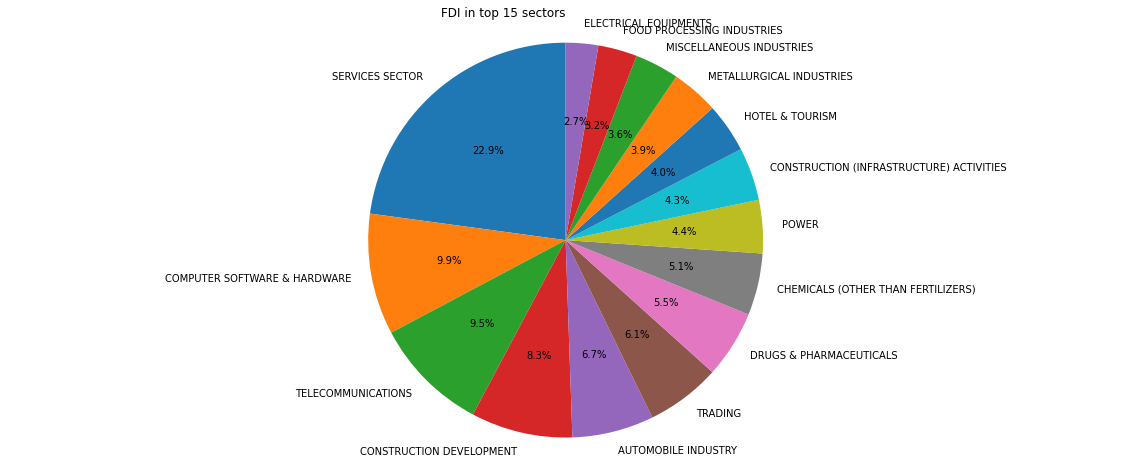

In [22]:
# Represented with piechart

plt.figure(figsize=(20,8))
plt.pie(top15['FDI_amount in INR (crore)'], labels=top15.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('FDI in top 15 sectors', fontdict={ 'horizontalalignment': 'right'})
plt.show()

##### from the above, we have seen that the service sector has the highest FDI. followed by computers, telecommunication, construction, etc.

### Bottom 15 sectors that got foreign direct investment (FDI)

In [23]:
bottom15 = Sectorwise_FDI.nsmallest(15,['FDI_amount in INR (crore)'])
Sum = bottom15['FDI_amount in INR (crore)'].sum()
bottom15['% of total'] = round(bottom15['FDI_amount in INR (crore)']/Sum*100,2) 
bottom15['% to amount'] = round((bottom15['FDI_amount in INR (crore)']/total_FDI)*100,2)
bottom15

,FDI_amount in INR (crore),FDI_amount in USD (million),% of total,% to amount
Sector,,,,
COIR,216.21,4.06,0.21,0.00
DEFENCE INDUSTRIES,260.99,5.12,0.25,0.00
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",416.15,7.98,0.40,0.00
COAL PRODUCTION,1221.34,27.74,1.19,0.01
PHOTOGRAPHIC RAW FILM AND PAPER,2783.66,67.28,2.71,0.02
INDUSTRIAL INSTRUMENTS,3692.18,76.12,3.59,0.02
DYE-STUFFS,5159.07,88.40,5.02,0.03
TEA AND COFFEE,5178.57,111.22,5.04,0.03
GLUE AND GELATIN,8182.08,128.39,7.96,0.05


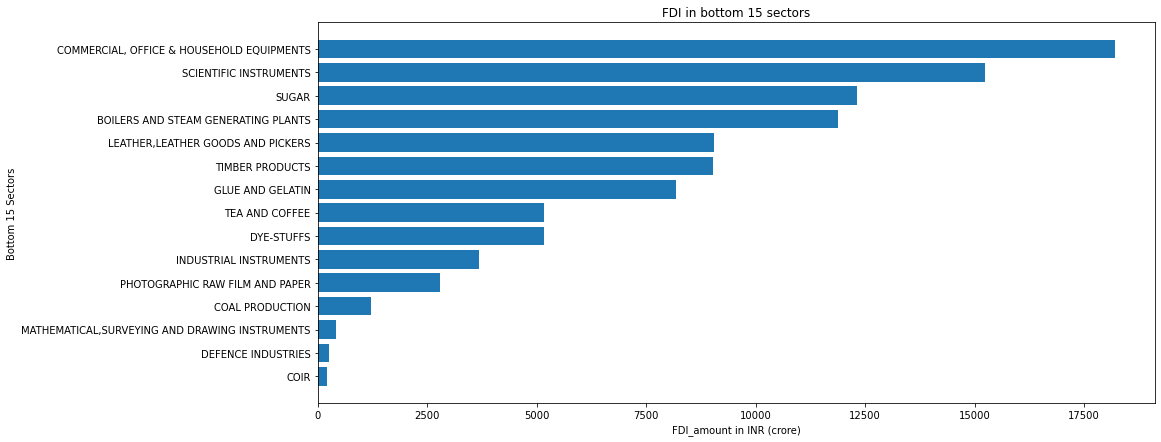

In [24]:
plt.figure(figsize=(15,7))
plt.barh(bottom15.index,bottom15['FDI_amount in INR (crore)'])
plt.title('FDI in bottom 15 sectors')
plt.xlabel('FDI_amount in INR (crore)')
plt.ylabel('Bottom 15 Sectors')
plt.show()

#### Here COIR has the lowest FDI of 216.21 crore. followed by defence of 260.99 Cr, mathematical 416.15 Cr and coal production 1221.34 Cr etc.

### Year to Year FDI analysis

#### We create new DataFrame based on previous and add new column of ' % of growth '

In [25]:
DF2 = melt1[['Year','FDI_amount in INR (crore)']]
DF2 = round(DF2.groupby('Year').sum(),2)

DF2['% of growth in FDI'] = round(DF2.pct_change()*100,2)
DF2

DF2.fillna('-')

,FDI_amount in INR (crore),% of growth in FDI
Year,,
2000-01,108659.51,-
2001-02,192080.55,76.77
2002-03,130862.03,-31.87
2003-04,100531.68,-23.18
2004-05,144615.74,43.85
2005-06,245244.71,69.58
2006-07,565127.22,130.43
2007-08,989405.58,75.08
2008-09,1443900.17,45.94


### Plotting visual for year to year growth

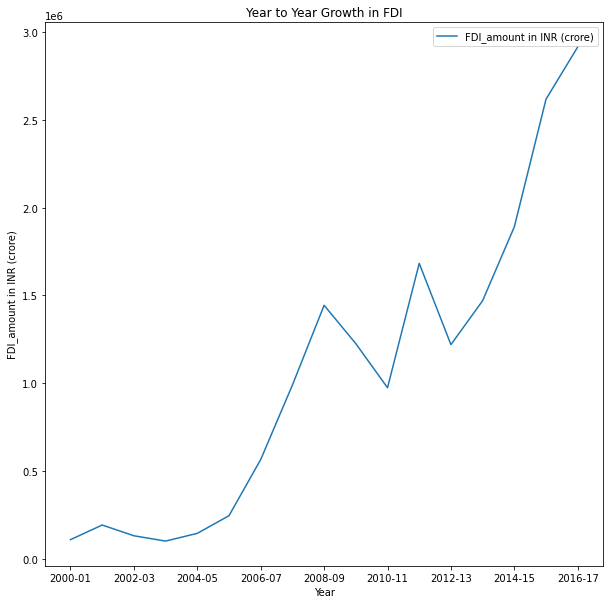

In [26]:
DF2.plot.line(y='FDI_amount in INR (crore)',figsize=(10,10))
plt.ylabel('FDI_amount in INR (crore)')
plt.title('Year to Year Growth in FDI')
plt.show()

### Conclusion

The above graph shows the total amount of FDI in India during the period 2000 to 2017.

from period 2000-01 to 2001-2002, it shows good result in FDI. a little bit down and up between 2002-03 and 2004-05. from 2004-05 to 2008-09 bulls hold the ground. again ups and down between 2008-09 and 2012-2013, and after 2012-13 till 2017 FDI boom again.

In [27]:
# save file 

Merged.to_csv('FDI_2000-2017.csv')